In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Carregando o conjunto de dados Iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [13]:
#verificar os tipos de dados, valores nulos e estatísticas descritivas básicas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB
None


In [14]:
#estatisitcas descritivas
print(df.describe())


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


In [3]:
# Pré-processamento
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:, :-1])

In [4]:
# Implementação do PCA
pca = PCA()
pca.fit(scaled_df)
explained_variance = pca.explained_variance_ratio_


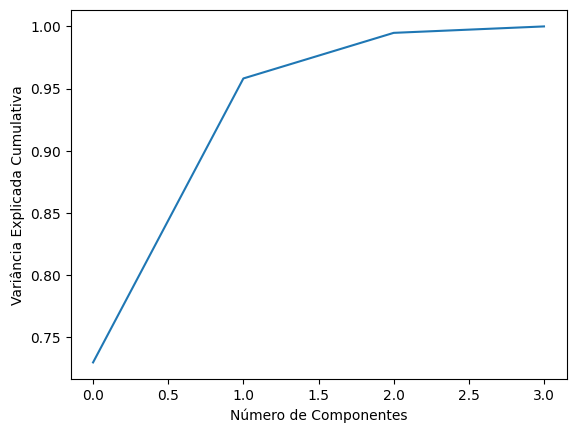

In [16]:
#grafico de cotovelo
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Cumulativa')
plt.show()


In [6]:
# Aplicando PCA com os dois primeiros componentes
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_df)
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
finalDf = pd.concat([principalDf, df[['target']]], axis=1)

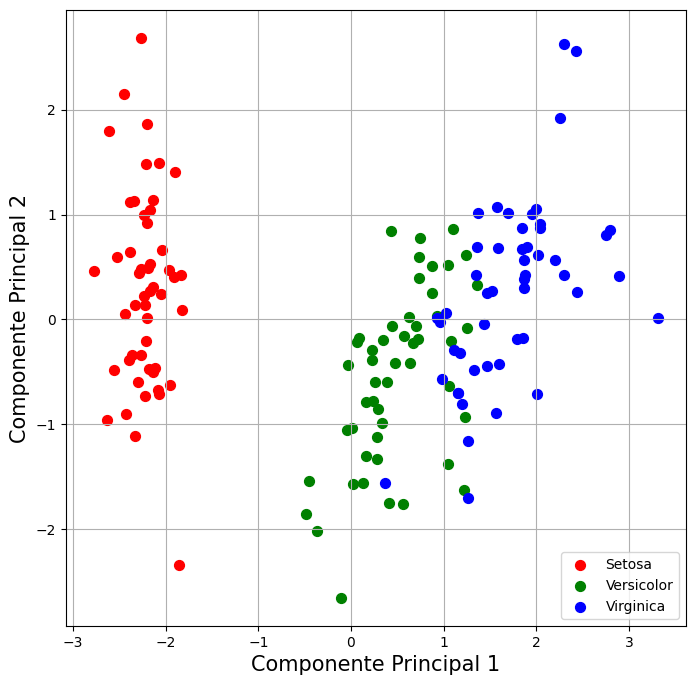

In [17]:
# Visualização dos Resultados
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Componente Principal 1', fontsize=15)
ax.set_ylabel('Componente Principal 2', fontsize=15)
targets = [0, 1, 2]
colors = ['r', 'g', 'b']
iris_species = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1'], finalDf.loc[indicesToKeep, 'PC2'], c=color, s=50)
ax.legend([iris_species[target] for target in targets])
ax.grid()
plt.show()
